<b><span style='color:#444444;font-size:200%;font-family:Calibri'>|</span><span style='color:#e29930;font-size:200%;font-family:Calibri'> Исследование данных интернет-магазина по продаже компьютерных игр</span></b>


### Описание проекта: 
Мы работаем в интернет магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Цель нашего исследования провести исследовательский анализ данных.
В данном проекте мы:
*   подготовим данные для исследования
*   посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие платформы лидируют по продажам и потенциально прибыльные в будущем
*   посмотрим как влияют отзывы пользователей и критиков, так же мы составим портрет пользователя каждого региона
*   проверим гипотезы, в которых сравним средние пользовательские рейтинги платформ и жанров




## 1. Откроем файл с данными и изучим общую информацию

Загрузим исследуемый датасет на google disk для удобства работы с разных устройств..

https://drive.google.com/file/d/1raeCGIP1k7qUXMByeyrrOc897M8rAbiD/view?usp=sharing

In [1]:
! gdown 1raeCGIP1k7qUXMByeyrrOc897M8rAbiD # подгружаем файл с gdrive

/bin/bash: gdown: command not found


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Описание данных:

---
*   Name — название игры
*   Platform — платформа
*   Year_of_Release — год выпуска
*   Genre — жанр игры
*   NA_sales — продажи в Северной Америке (миллионы проданных копий)
*   EU_sales — продажи в Европе (миллионы проданных копий)
*   JP_sales — продажи в Японии (миллионы проданных копий)
*   Other_sales — продажи в других странах (миллионы проданных копий)
*   Critic_Score — оценка критиков (максимум 100)
*   User_Score — оценка пользователей (максимум 10)
*   Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [4]:
df.info() # изучим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.duplicated().sum() # дубликаты отсутствуют

0

## 2. Подготовим данные
### 2.1 Приведем названия столбцов к нижнему регистру

In [7]:
df.columns = map(str.lower, df.columns)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2.2 Обработаем пропуски

In [8]:
pd.DataFrame(round(df.isna().mean()*100,6)).style.background_gradient('coolwarm') # посмотрим долю пропусков, чтобы принять решение о удалении, замене либо игнорировании пропусков

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


In [9]:
df[df['name'].isna()] # посмотрим Nan строки в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Комментарий ревьюера
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В пяти столбцах присутствуют nan, удаляем эти строки ..

In [11]:
df= df.dropna(subset=['name']) 
df['name'].isna().sum()

0

In [12]:
df['year_of_release'].isna().sum() # посмотрим Nan строки в столбце year_of_release

269

269 строк, так же Nan присутствует и в других столбцах, с учетом того что это 1.6% нашего датафрейма и что данный столбец нам понадобится в дальнейшем исследовании, так же удаляем Nan строки

In [13]:
df= df.dropna(subset=['year_of_release']) 

In [14]:
# посмотрим ситуацию с пропусками теперь..
pd.DataFrame(round(df.isna().mean()*100,6)).style.background_gradient('coolwarm') 

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.453418
user_score,40.166626




---



*   После удаления Nan в столбце year_of_release так же ушли Nan в столбце genre,
*   critic_score, user_score сейчас трогать не будем т.к это 40-50% нашего датафрейма, скорее всего данные игры не оценивали ни критики, ни пользователи


Посмотрим более пристально на последний столбец rating

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в **1994** году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

EC — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

E — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

E10+ — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

T — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

AO — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

RP — Rating Pending Рейтинг ожидается.

In [15]:
# т.к EC и K-A - устаревшая градация, поменяем эти рейтинги на Е
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'EC', 'rating'] = 'E'

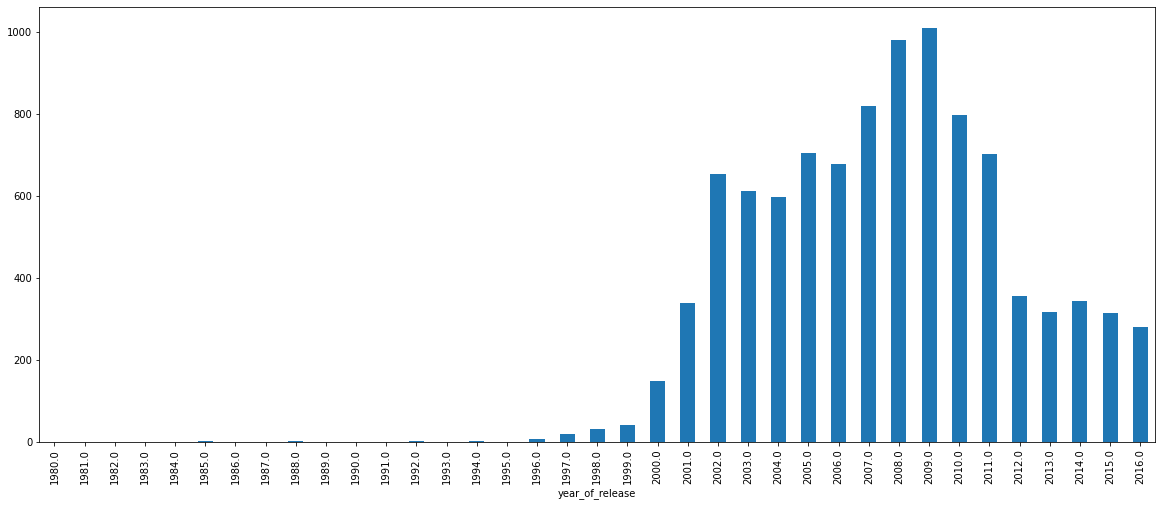

In [16]:
# ESRB была основана в 1994 году, логично что до этого времени рейтингов не было
plt.figure(figsize=(20,8))
df.groupby('year_of_release')['rating'].agg('count').plot(kind='bar');

Действительно рейтингов не было до 1996 г, соответственно все строки до этого времени заполнены nan значениями, а так же ESRB предназначен для маркировки игр для США и Канады. Логично, что для других регионов он не заполняется..

In [17]:
df['rating'] = df['rating'].fillna('no_rating') # поставим "заглушку" для корректного анализа рейтинга в дальнейшем

### 2.3 Преобразуем данные в нужные типы

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # добавим столбец с суммарными продажами по всем регионам
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


In [19]:
df['year_of_release'] = df['year_of_release'].astype('int') # преобразуем year_of_release в целое число

In [20]:
df[df["user_score"] == "tbd"].head() # ошибка выдает нам нечисловое значение user_score, посмотрим на эти колонки..

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24


In [21]:
# Обнулим и переведем столбец в float
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

In [22]:
df.info() # посмотрим результат, теперь тип столбцов соответствукт содержимому

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [23]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 3. Проведём исследовательский анализ данных
### 3.1 Посмотрим, сколько игр выпускалось в разные годы

In [24]:
df.groupby('year_of_release')['platform'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64

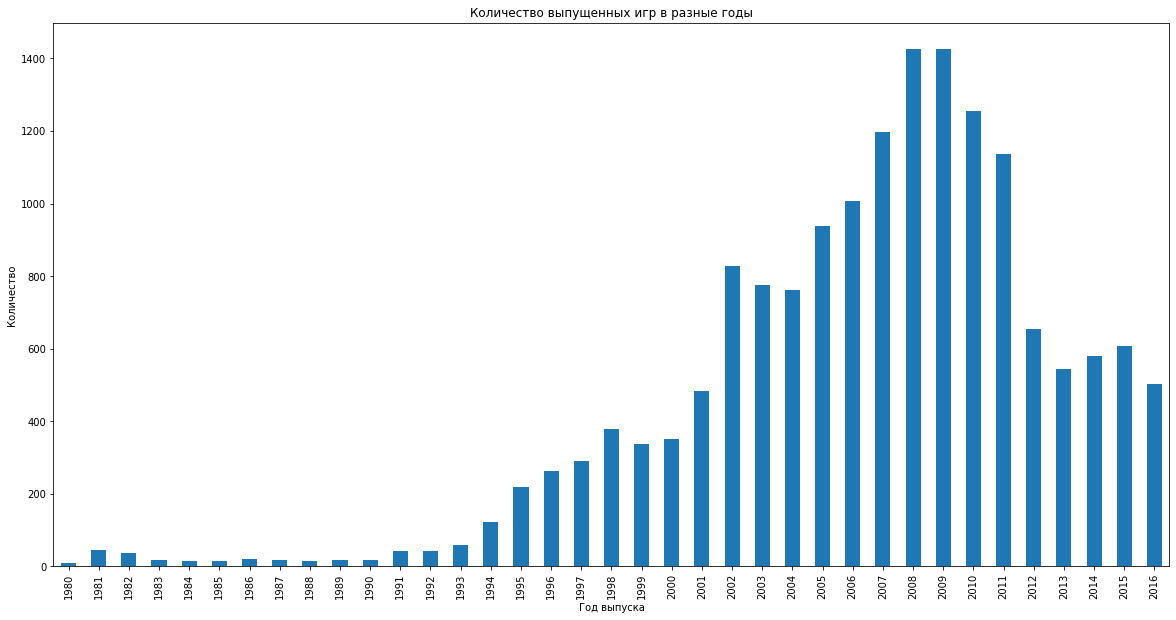

In [25]:
plt.figure(figsize=(20,10))
df.groupby('year_of_release')['platform'].agg('count').plot(y='year_of_release', kind = 'bar')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Количество выпущенных игр в разные годы')
plt.show()

Самое большое количество игр было выпущено в 2008 и 2009 году

In [26]:
# посчитаем сколько лет выпускались игры на разных платформах 
df.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: year_of_release, dtype: int64

In [27]:
df.groupby('platform')['year_of_release'].nunique().mean() 

7.67741935483871

---
7 лет - среднее время 'жизни' платформы, однако есть как долгожители такие как 
PC, так и не очень удачные платформы(TG16, GG, PCFX) со сроком жизни 1 год

In [28]:
# построим большую таблицу, которая покажет нам жизненный цикл платформ по годам
platform_life = df.pivot_table(index = 'platform',  columns = 'year_of_release', 
                                values = 'name', aggfunc='count',fill_value='-',
                                margins=True).reset_index()                               
pd.set_option('display.max_columns', None)
platform_life

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,116
1,3DO,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3
2,3DS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0,512
3,DC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,7.0,14.0,20.0,8.0,1.0,-,-,-,-,1.0,1.0,-,-,-,-,-,-,-,-,52
4,DS,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-,2121
5,GB,-,-,-,-,-,-,-,-,1.0,10.0,3.0,9.0,7.0,-,3.0,4.0,6.0,8.0,8.0,11.0,17.0,10.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,97
6,GBA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,-,-,-,-,-,-,-,-,-,811
7,GC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,22.0,152.0,144.0,83.0,97.0,40.0,4.0,-,-,-,-,-,-,-,-,-,542
8,GEN,-,-,-,-,-,-,-,-,-,-,1.0,1.0,6.0,7.0,12.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,27
9,GG,-,-,-,-,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1


по приведенной выше таблице можно проследить судьбу любой платформы..

In [29]:
# Консоль DS была выпущена в 2004 году в Канаде, США и Японии. Соответственно игры в 1985 году быть не может..
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Достоверно утверждать сложно, но судя по информации в интернете скорее всего не правильна указана платформа вместо Nintendo DS которая была выпущена в 2004 году, возможно должна быть указана Nintendo Entertainment System (NES) которая как раз выпускалась в середине 1980-х и начале 1990-х годов, но так же была найдена игра 1998 года с таким же названием выпушеная на платформе PS. 



### 3.2 Посмотрим, как менялись продажи по платформам

In [30]:
# посмотрим платформы с наибольшими суммарными продажами за весь период
df.groupby('platform')['all_sales'].agg('sum').sort_values(ascending=False) # посмотрим платформы с наибольшими суммарными продажами за весь период

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

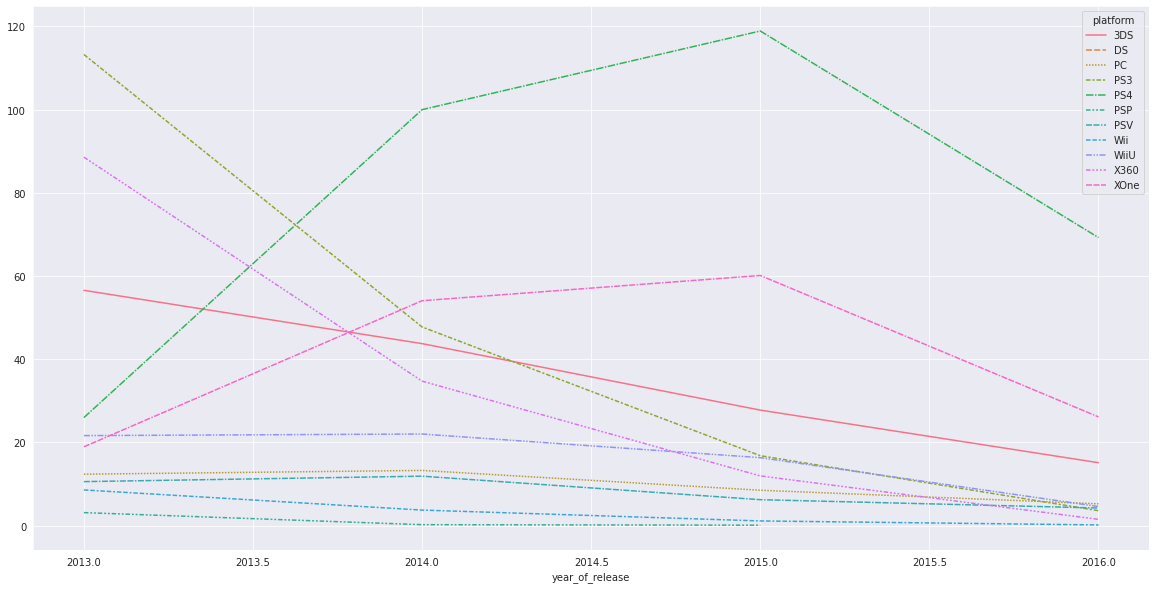

In [31]:
# посмотрим продаж распределение по годам у самых свежих платформ
t = df.loc[df['year_of_release']>= 2013] # создадим переменную t где возьмем данные с 2013 по 2016
top11_platform = t.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
plt.figure(figsize=(20, 10))
sns.set_style("darkgrid")
sns.lineplot(data = top11_platform);

Можно сделать вывод, что лидируют по продажам на данный момент консоли PS2, X360. Однако их продажи падают(модели устарели и вышли более свежие) и судя по динамике потенциально прибыльными и перспективными платформами в последнее время являются Xbox One, PS 4, WiiU , 3DS, PS3


---


# 3.3 Построим график «ящик с усами» по глобальным продажам игр в разбивке по пяти  перспективным платформам

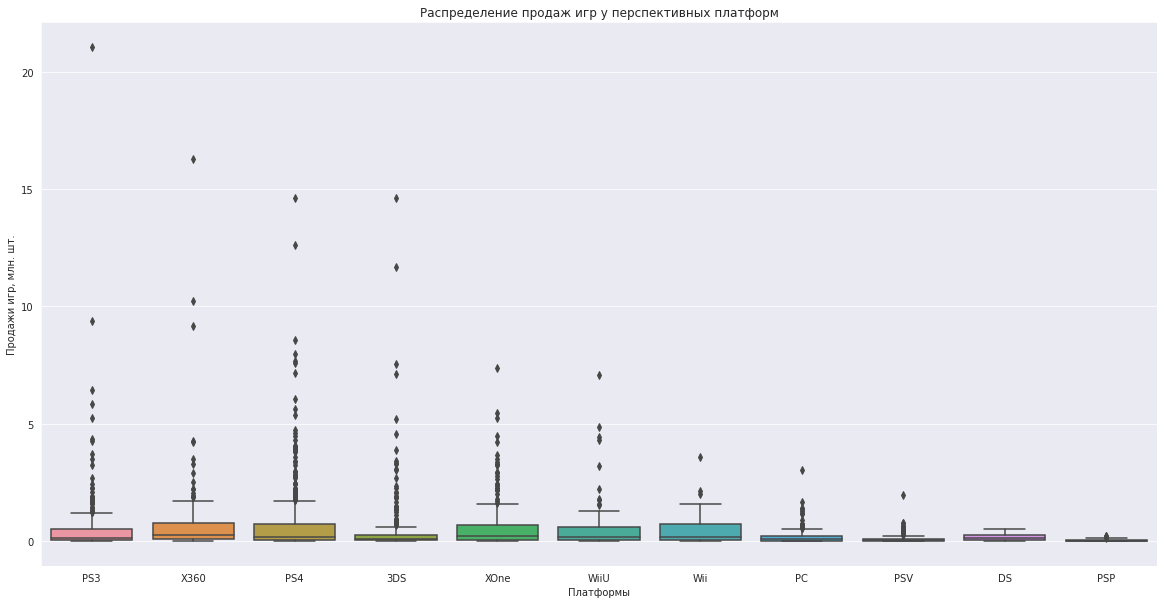

In [32]:
# сделаем диаграмму размаха со всеми выбросами
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=t, x='platform', y='all_sales');
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

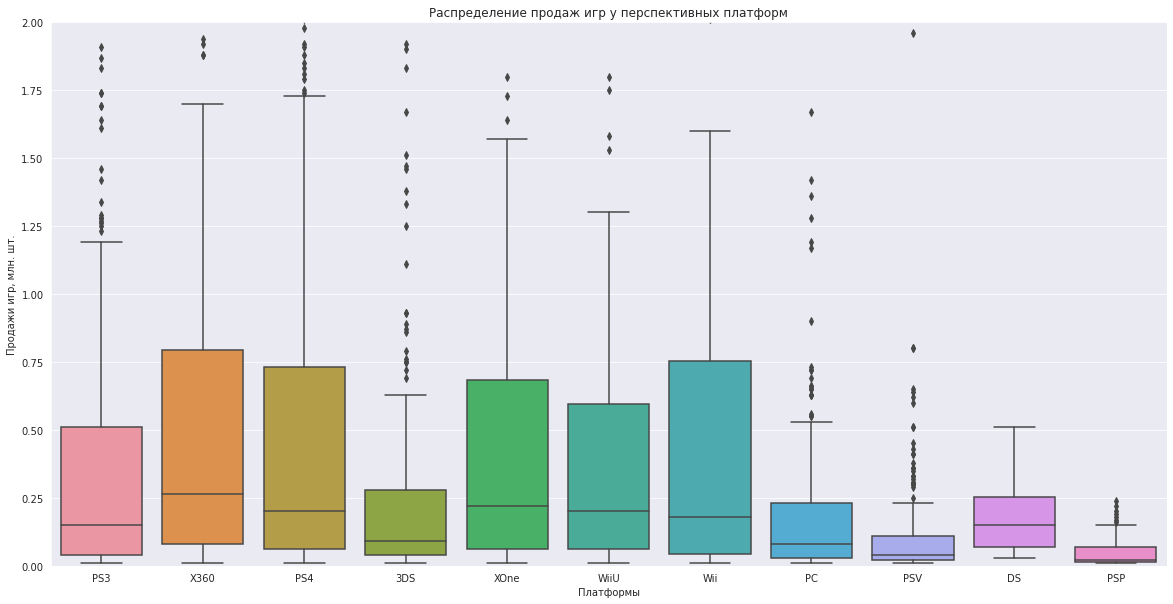

In [33]:
# приблизим диаграмму размаха 
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=t, x='platform', y='all_sales');
ax.set_ylim(0, 2.0)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()



---


Видим что для всех платформ boxplot смещен вниз это значит что всех этих платформах выходит много игр с небольшими продажами, однако есть выбросы, которые говорят нам что на всех платформах присутствуют игры бестселлеры, которые существенно обгоняют основную массу по продажам 



### 3.3 Посмотрим как влияют на продажи внутри одной популярной платформы(PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

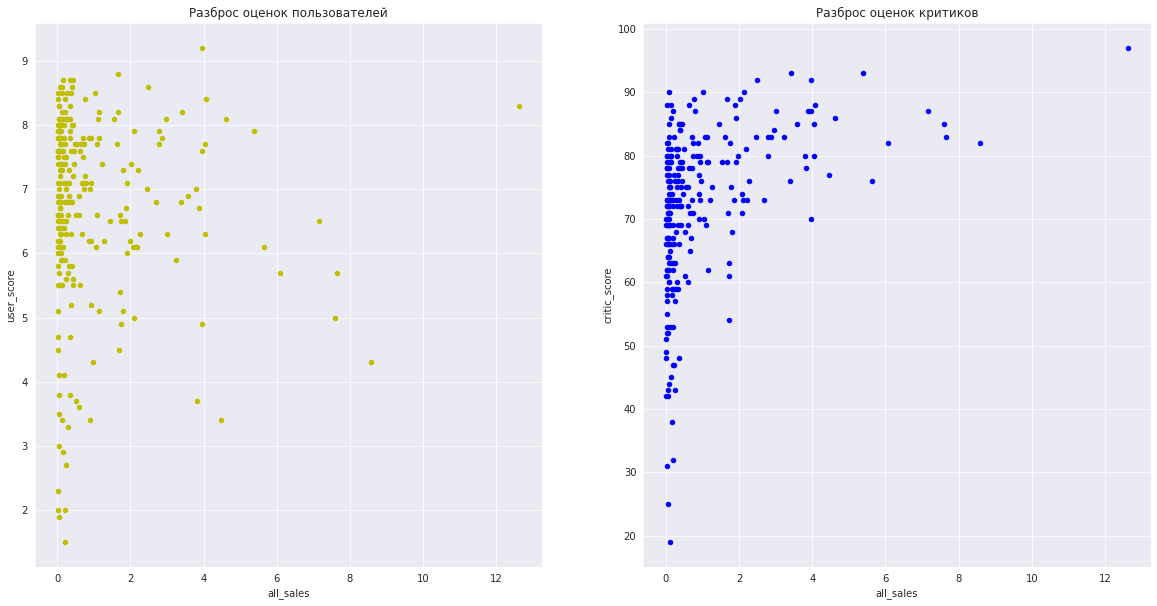

In [34]:
# Построим диаграмму рассеяния для user_score и critic_score
data_ps4=t.query('platform == "PS4"')
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
data_ps4.plot(kind='scatter', y='user_score', x='all_sales', color='y', ax=ax1, figsize=(20,10), 
title='Разброс оценок пользователей');
data_ps4.plot(kind='scatter', y='critic_score', x='all_sales', color='b', ax=ax2, 
title='Разброс оценок критиков');
plt.show()

Отметим что в данных диаграммах рассеивания правый нижний угол пустой, а значит отсутствуют игры с низкой оценкой и высокими продажами. В целом можно проследить зависимость между оценками критиков и общими продажами игр для PS4.

Коэффициент корреляции Пирсона


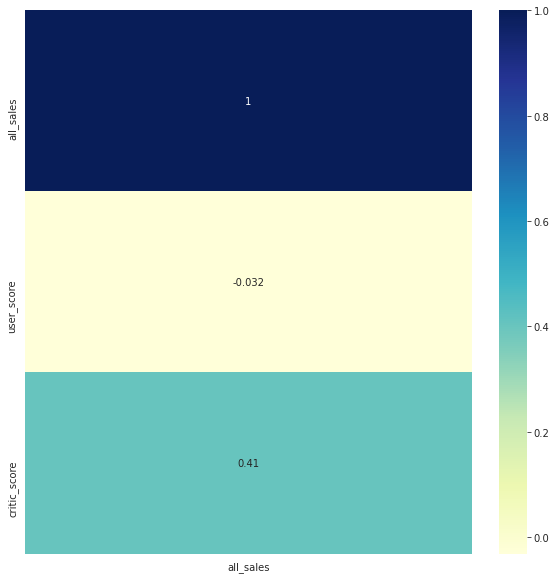

In [35]:
# посчитаем коэффициент корреляции Пирсона
plt.figure(figsize=(10, 10))
print('Коэффициент корреляции Пирсона')
sns.heatmap(
    data_ps4[['all_sales','user_score', 'critic_score']].corr()[['all_sales']],cmap="YlGnBu", annot = True )
plt.show()

Коэфициент кореляции для critic_score 0.43 что подтверждает вывод сделанный ранее, оценки критиков немного кореллируют с общими продажами..

Платформа  PS3
Коэффициент корреляции Пирсона



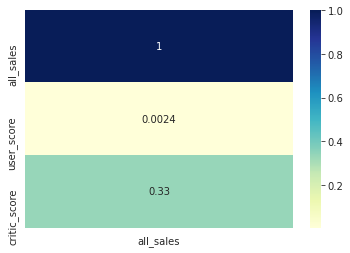

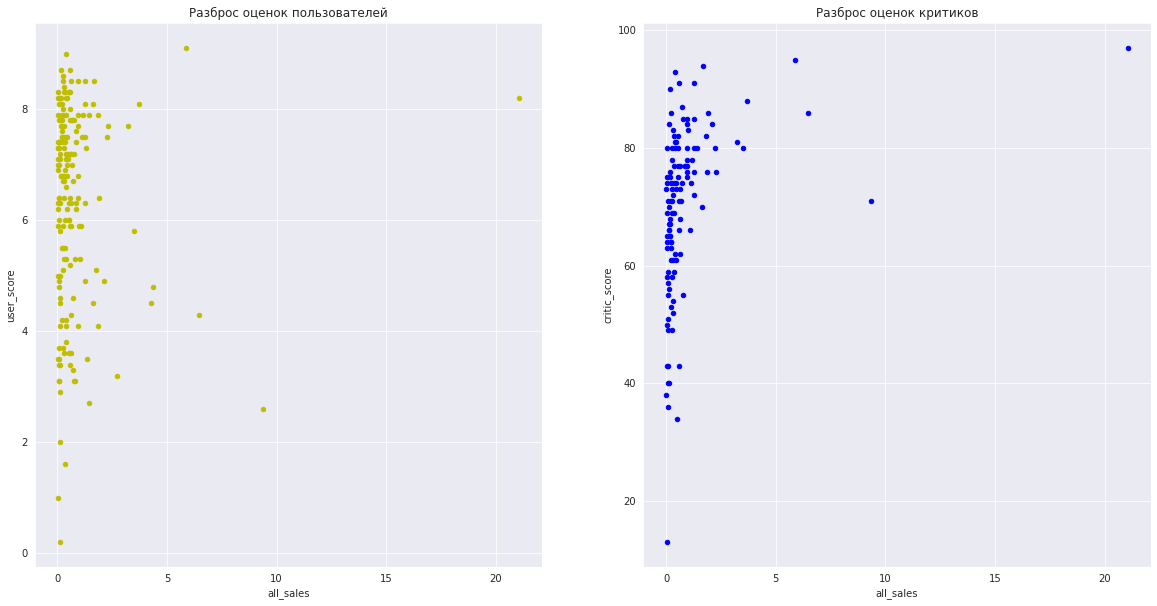

Платформа  X360
Коэффициент корреляции Пирсона



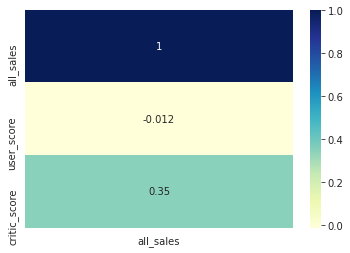

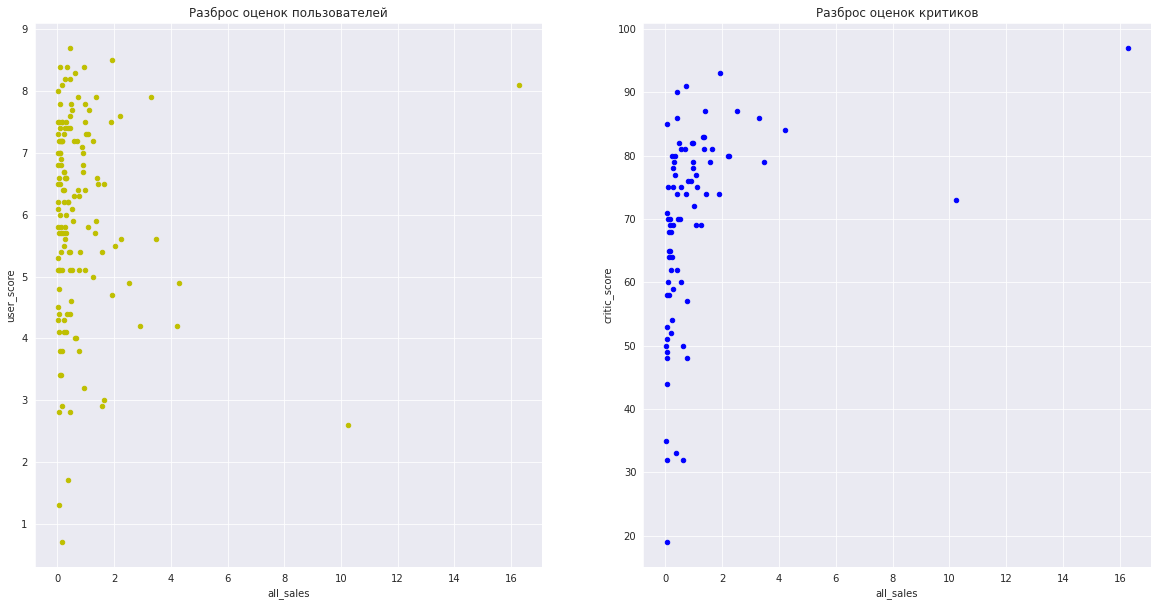

Платформа  PS4
Коэффициент корреляции Пирсона



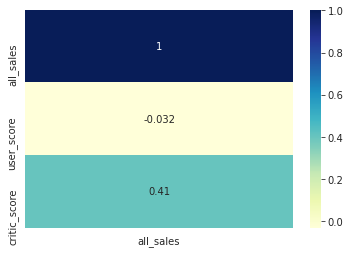

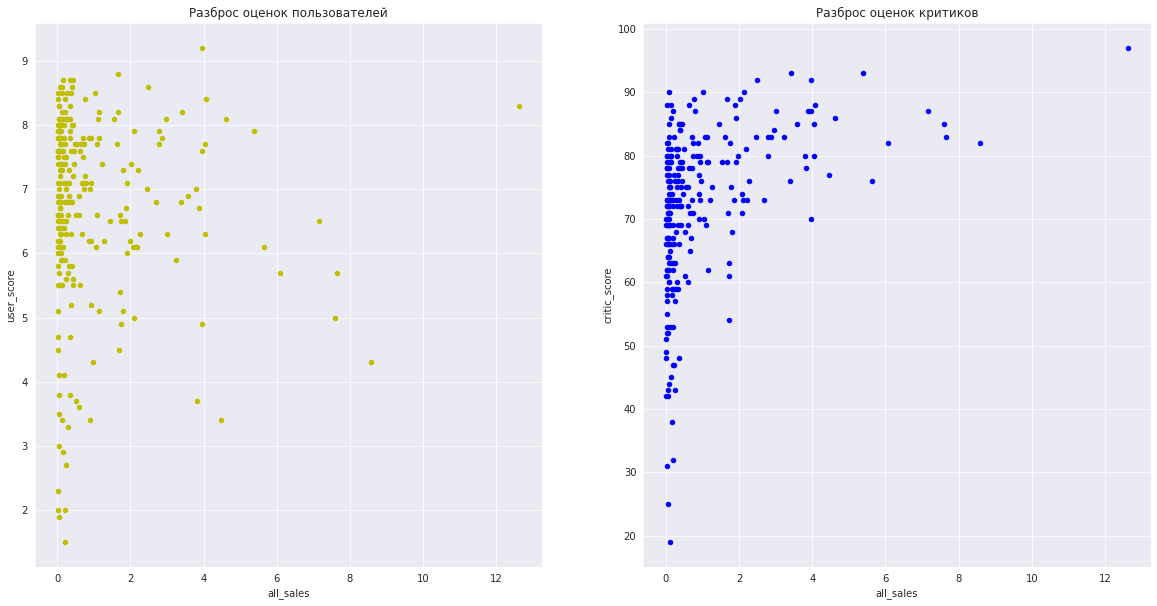

Платформа  3DS
Коэффициент корреляции Пирсона



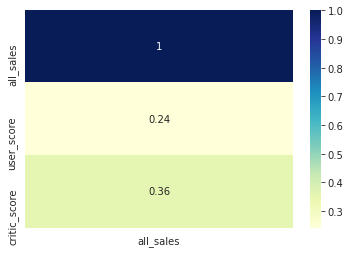

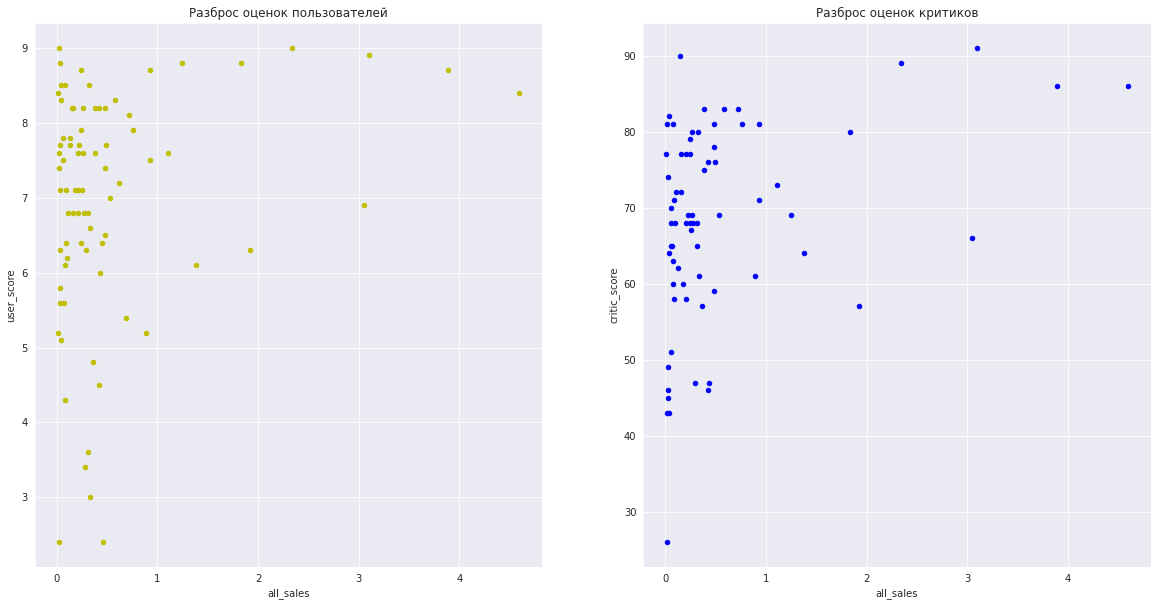

Платформа  XOne
Коэффициент корреляции Пирсона



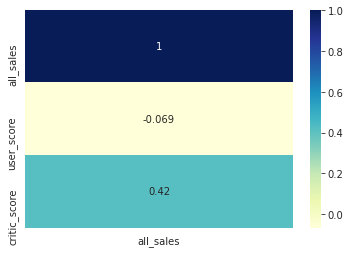

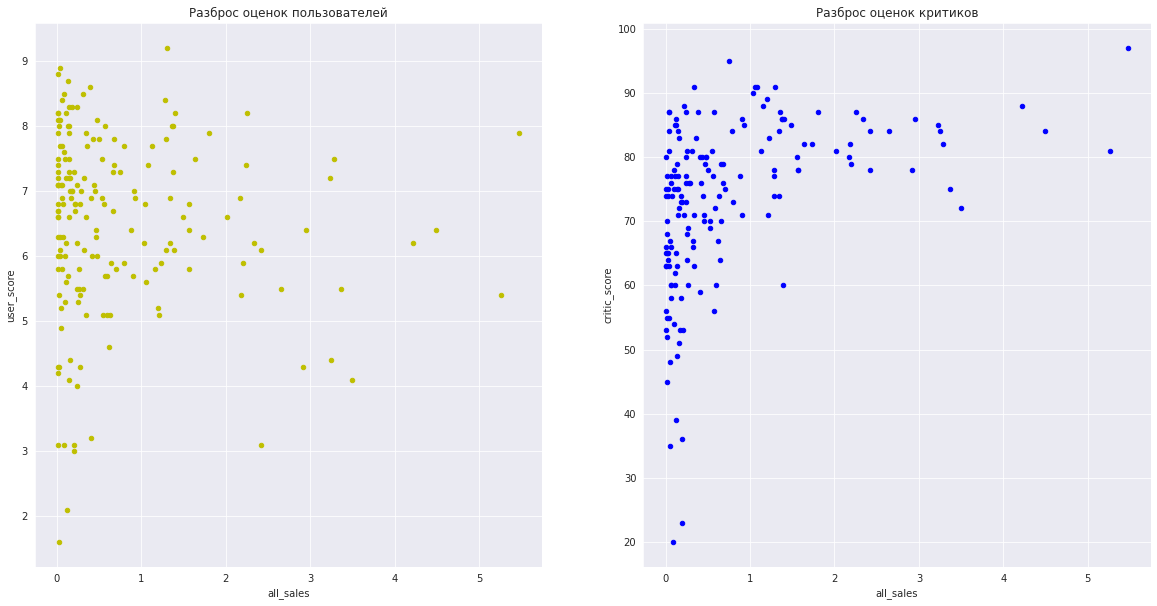

Платформа  WiiU
Коэффициент корреляции Пирсона



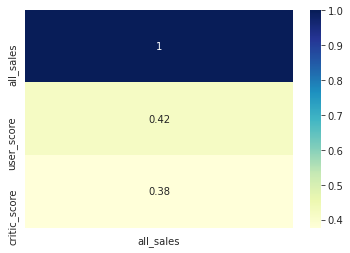

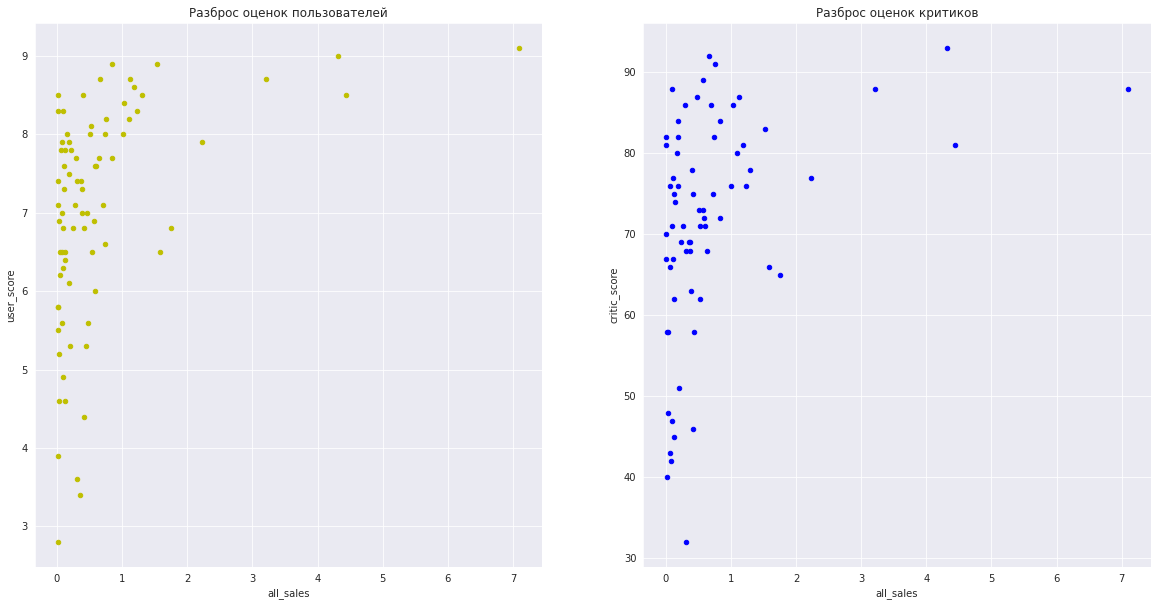

Платформа  Wii
Коэффициент корреляции Пирсона



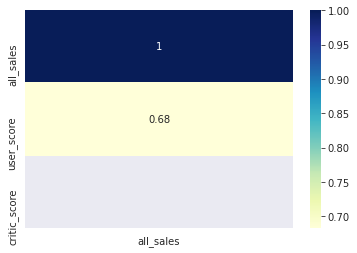

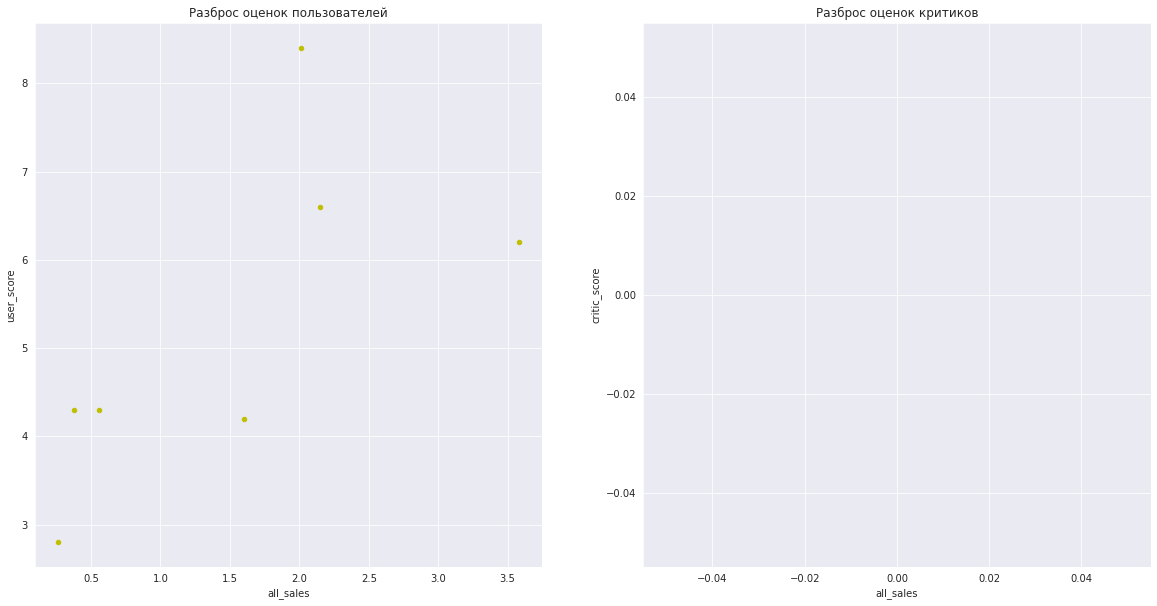

Платформа  PC
Коэффициент корреляции Пирсона



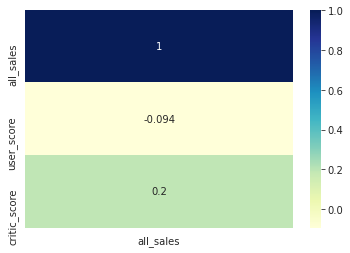

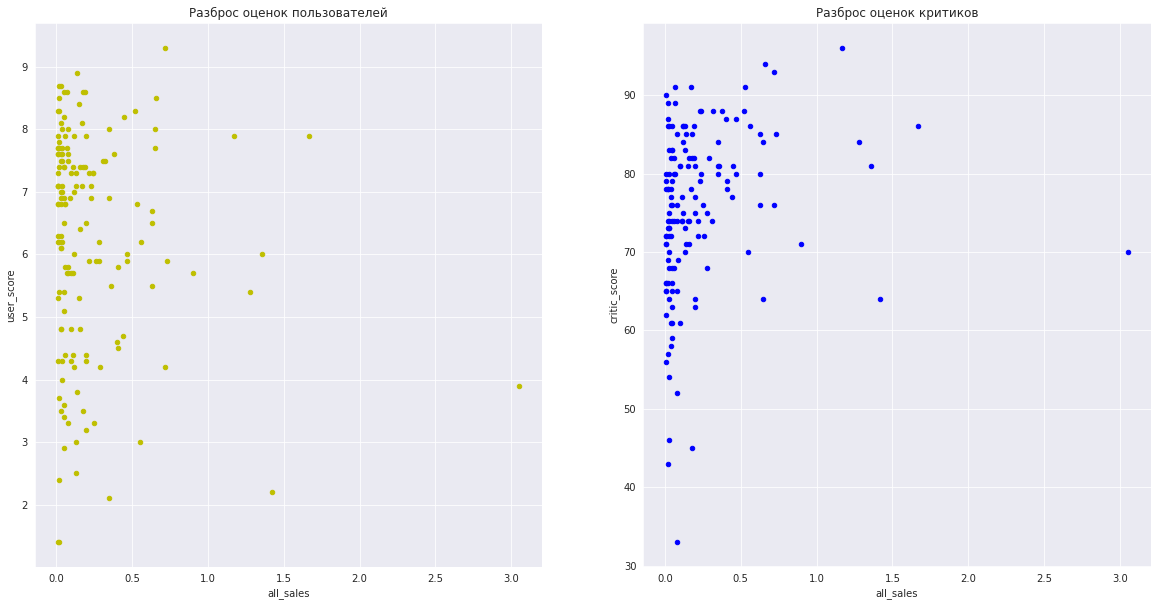

Платформа  PSV
Коэффициент корреляции Пирсона



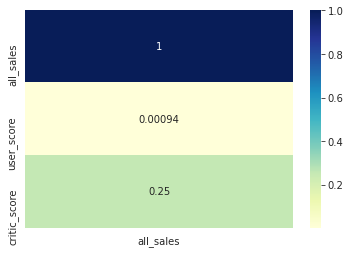

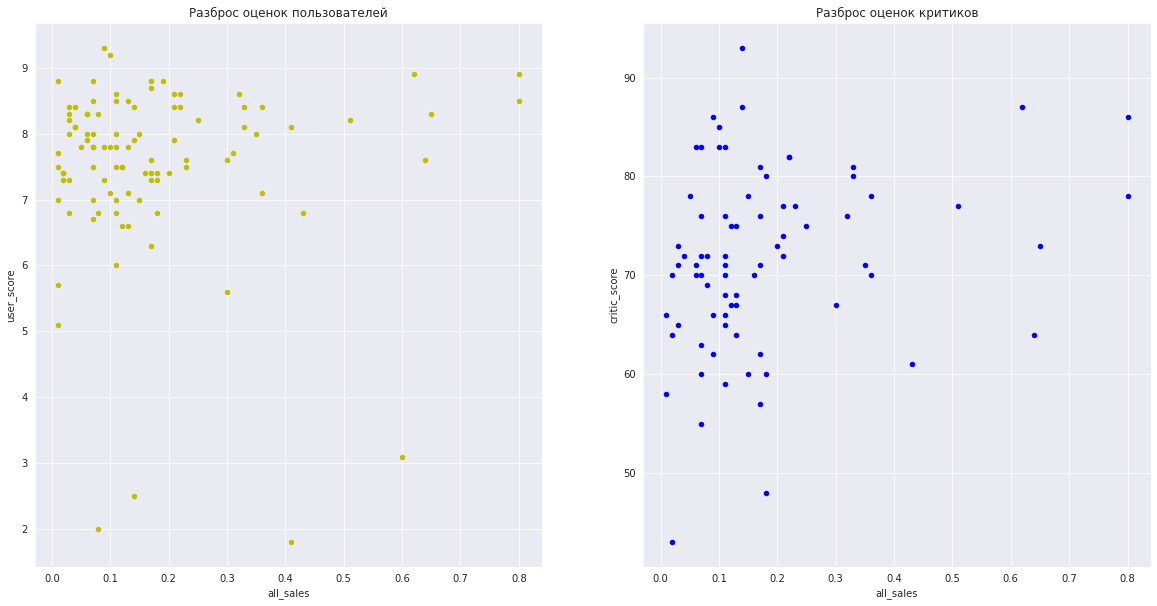

Платформа  DS
Коэффициент корреляции Пирсона



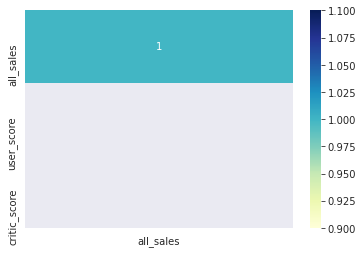

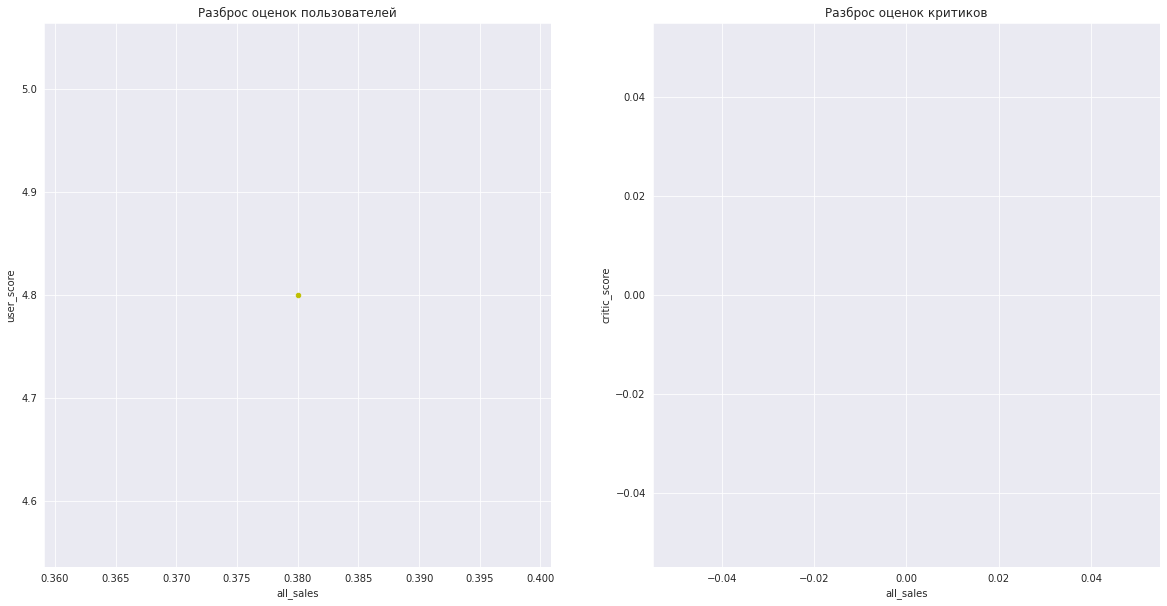

Платформа  PSP
Коэффициент корреляции Пирсона



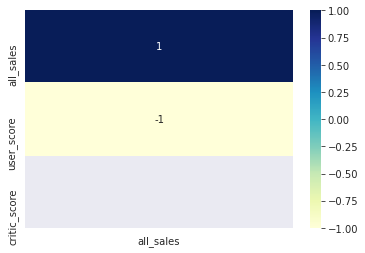

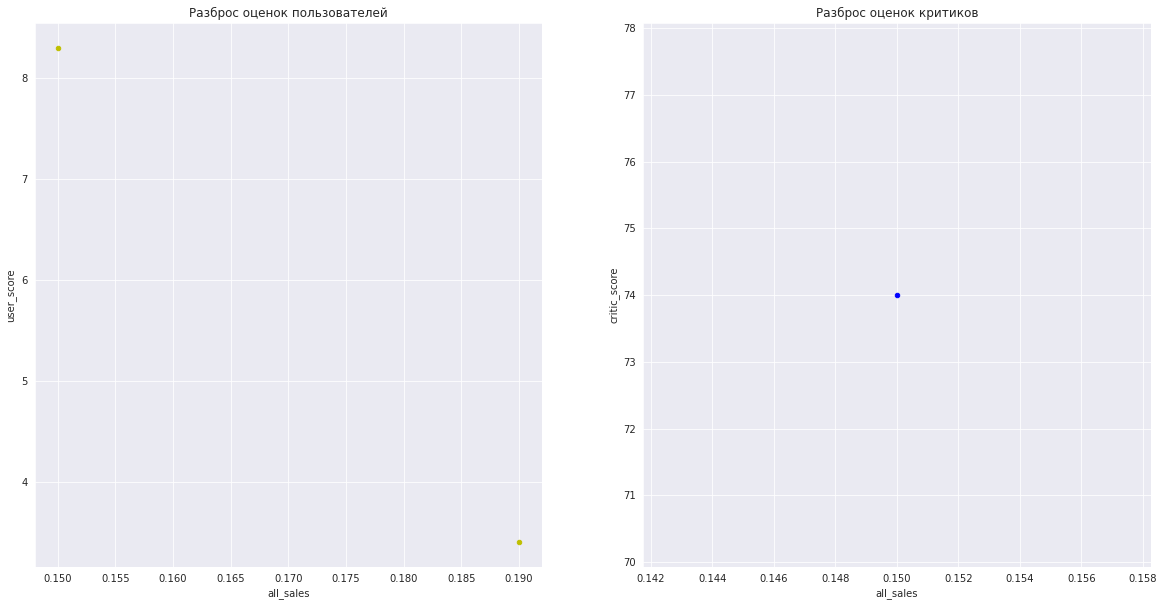

In [36]:
# Соотнесем выводы с продажами игр на других платформах

for platform in t['platform'].unique():
    print('Платформа ', platform)
    temp_df = t.query('platform == "' + platform + '"')
    print('Коэффициент корреляции Пирсона')
    sns.heatmap(
    temp_df[['all_sales','user_score', 'critic_score']].corr()[['all_sales']],cmap="YlGnBu", annot = True )
    print()
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    temp_df.plot(kind='scatter', y='user_score', x='all_sales', color='y', ax=ax1, figsize=(20,10), 
    title='Разброс оценок пользователей');
    temp_df.plot(kind='scatter', y='critic_score', x='all_sales', color='b', ax=ax2, 
    title='Разброс оценок критиков');
    plt.show()




---


Наши выводы сделанные для PS4 подтвердились и для всеx платформ за актуальный период, можно утверждать что существует слабая прямая линейная связь между отзывами критиков и общими продажами игр


### 3.4 Посмотрим на общее распределение игр по жанрам

In [37]:

df.groupby('genre')['all_sales'].count()

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: all_sales, dtype: int64

In [38]:
# Комментарий ревьюера
temp1, temp2 = t.all_sales.sum(), df[df.year_of_release >= 2013].all_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1090.69, 1090.69, 0.0)

In [39]:
# сделаем сводник по жанрам игр перспектвных платформ, и проведем его анализ
t.pivot_table(index='genre', values='all_sales', aggfunc=('sum','count','mean','median'))

,count,mean,median,sum
genre,,,,
Action,766,0.420196,0.110,321.87
Adventure,245,0.096490,0.030,23.64
Fighting,80,0.441375,0.125,35.31
Misc,155,0.405290,0.100,62.82
Platform,74,0.576081,0.225,42.63
Puzzle,17,0.186471,0.060,3.17
Racing,85,0.469294,0.120,39.89
Role-Playing,292,0.499623,0.125,145.89
Shooter,187,1.245882,0.450,232.98


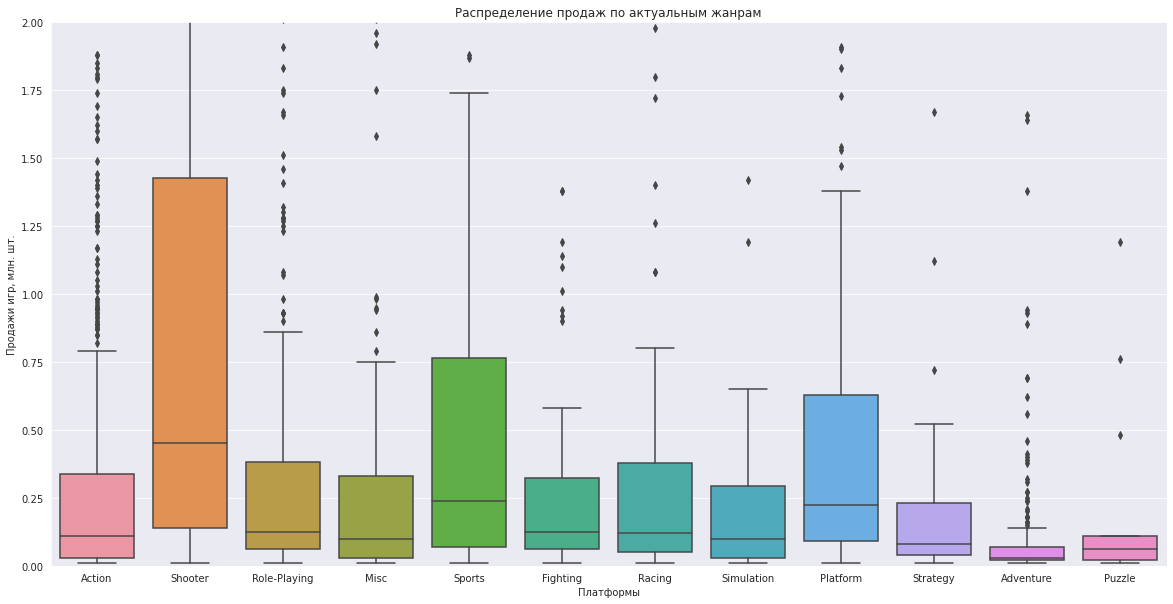

In [40]:
# сравнение продаж проиллюстрируем диаграммой размаха
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=t, x='genre', y='all_sales');
ax.set_ylim(0, 2.0)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж по актуальным жанрам')
plt.show()

Больше всего игр выпускалось в жанре Action,так же в этом жанре самые большие общие продажи, при этом самым прибыльным является жанр Shooter т.к в среднем одна игра заработала порядка 0.45 млн долларов, у многих платформ среднее значение существенно превышает медиану что говорит о большом количестве бестселлеров. Самые неприбыльные жанры это Strategy, Puzzle, Adventure

## 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP) cамые "ходовые" платформы из последних популярных платформ

In [41]:

pd.DataFrame(round(t.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc ='sum'),3)
    .apply(
    lambda col: (col / col.sum())*100, 
    axis=0)).style.background_gradient('coolwarm') 

,eu_sales,jp_sales,na_sales
platform,,,
3DS,7.893328,48.167353,8.727239
DS,0.216710,0.000000,0.130223
PC,6.465594,0.000000,2.538210
PS3,17.288326,16.586163,14.507322
PS4,35.971241,11.336838,24.842933
PSP,0.043342,2.336980,0.000000
PSV,1.555210,13.205001,1.151447
Wii,1.511868,0.035516,1.498709
WiiU,5.060806,7.728371,6.673368



*   Самые популярные платформы в Европе PS3, PS4
*   Самые популярные платформы в Японии PS3, 3DS
*   Самые популярные платформы в Северной америке PS3, PS4, X360 и XOne


---
Отметим, что продажи игр на платформе 3DS существенно выше в Японии, чем в Европе или Северной Америке, при этом в Японии игры на XOne практически не покупают..
Наши выводы подтверждаются информацией из Википедии
XOne принадлежит компании Microsoft и продавалась в основном в Америке и Европе, 3DS японская платформа компании Nintendo


In [42]:
pd.DataFrame(round(t.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc ='sum'),3)
    .apply(
    lambda col: (col / col.sum())*100, 
    axis=0)).style.background_gradient('coolwarm') 

,eu_sales,jp_sales,na_sales
genre,,,
Action,30.117533,28.761188,28.797606
Adventure,2.103358,4.134110,1.631217
Fighting,2.179843,5.434011,3.552580
Misc,5.109247,6.535019,6.280414
Platform,3.972159,3.402472,4.144296
Puzzle,0.254952,0.838187,0.189623
Racing,5.147490,1.633755,2.960864
Role-Playing,9.425592,36.255150,10.600626
Shooter,22.400122,4.695269,25.071394


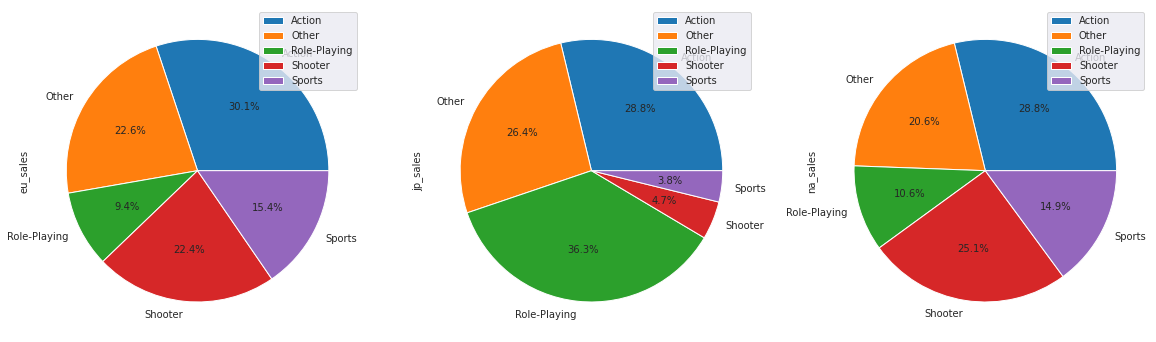

In [43]:
# Сделаем круговую диаграмму 
a=t.apply(lambda x: 
          x.replace({'Adventure':'Other', 'Fighting': 'Other', 'Misc': 'Other', 'Puzzle': 'Other', 
                    'Platform': 'Other','Racing': 'Other','Simulation': 'Other','Strategy': 'Other'}
            ,regex=True)).pivot_table(
            index = 'genre',
            values = ['na_sales', 'eu_sales', 'jp_sales'],
            aggfunc ='sum')

a.plot(kind='pie',subplots=True, figsize=( 20 , 20 ),autopct='%1.1f%%')
plt.show()


*   Самые популярные жанры в Европе Action, Shooter и Sports
*   Самые популярные жанры в Японии Action и Role-Playing
*   Самые популярные жанры в Северной Америке Action, Shooter и Sports


---


Хочется отметить что в Японии доля покупающих ролевые игры существенно выше,  чем в Европе или Северной Америке, при этом доля покупающих шутеры в Японии гораздо меньше чем в в этих регионах..


Посмотри влияет ли рейтинг ESRB на продажи в отдельном регионе:

*   «E» («Everyone») — «Для всех»:
*   «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
*   «M» («Mature») — «Для взрослых»
*   «T» («Teen») — «Подросткам»



In [44]:
pd.DataFrame(round(t.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc ='sum'),3)
    .apply(
    lambda col: (col / col.sum())*100, 
    axis=0)).style.background_gradient('coolwarm') 

,eu_sales,jp_sales,na_sales
rating,,,
E,21.252836,10.754369,18.059903
E10+,10.883920,4.183833,12.391766
M,37.049690,10.022731,37.744169
T,10.695255,14.625657,11.375111
no_rating,20.118298,60.413411,20.429051



---
В Северной Америке и Европе лучше всего продаются игры с рейтингом M - для взрослых, в Японии - без рейтинга, возможно он не требуется для игр произведенных в Японии. Так же возможно это связано с жанрами игр, так жанр, Shooter который в Японии продается меньше обычно имеет рейтинг М или Т, а жанр РПГ который в Японии популярен имеет меньшие возрастные ограничения..

In [45]:
temp = df[df.year_of_release >= 2010].copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_rating    2164
E             943
T             847
M             719
E10+          603
RP              1
Name: rating, dtype: int64

## 5. Проверяем гипотезы


1.   Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2.  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
---
H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения. Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀

Соотватственно определим нулевую и альтернативную гипотезу для нашего теста

*   H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
*   H₁ - Средние пользовательские рейтинги платформ Xbox One и PC разные

Мы будем сравнивать две генеральные совокупности, соответственно возьмем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind, так же установим параметр equal_var=True.

Согласно данным на портале 
https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/
если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.

у нас более 100 значений соответственно берем критический уровень статистической значимости
alpha = .01 



In [46]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
# H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные
from scipy import stats as st
only_xone = t[t['platform']=='XOne'].dropna() 
sample_1 = only_xone['user_score']
only_pc = t[t['platform']=='PC'].dropna()
sample_2 = only_pc['user_score']
sample_1.count()
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    sample_1, 
    sample_2)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.17306926618147322
Не получилось отвергнуть нулевую гипотезу




---
Не получилось отвергнуть нулевую гипотезу - соответственно средние пользовательские рейтинги платформ Xbox One и PC одинаковые

---


Отметим что наши генеральные совокупности не очень большие и, можно просто рассчитать их средние и сравнить между собой без всяких статистических тестов

In [47]:
sample_1.mean()

6.538181818181818

In [48]:
sample_2.mean()

6.3020270270270276

In [49]:
sample_1.mean()-sample_2.mean() #действительно, разница в рейтингах за актуальный период минимальна

0.23615479115479054

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

По принциам описанным выше определим нулевую и альтернативную гипотезу для нашего теста

*   H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые
*   H₁ - Средние пользовательские рейтинги жанров Action и Sports разные

Мы будем сравнивать две генеральные совокупности, соответственно возьмем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind, так же установим параметр equal_var=True.

у нас более 100 значений соответственно берем критический уровень статистической значимости alpha = .01

In [50]:

only_action = t[t['genre']=='Action'].dropna()
sample_3 = only_action['user_score']
only_sports = t[t['genre']=='Sports'].dropna()
sample_4 = only_sports['user_score']
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    sample_3, 
    sample_4)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу


---
Отвергаем нулевую гипотезу - соответственно средние пользовательские рейтинги жанров Action и Sports за актуальный период разные


---
Так же можем проверить наши выводы..


In [51]:
sample_3.mean()

6.9362459546925574

In [52]:
sample_4.mean()

5.665454545454545

In [53]:
sample_3.mean()-sample_4.mean()

1.2707914092380124

что и требовалось доказать...

## 6. Общий вывод

Проведя анализ датафрейма с данными интернет-магазина по продаже компьютерных игр, нам удалось сделать сл. выводы:

*   7 лет - среднее время 'жизни' платформы, однако есть как долгожители такие как PC, так и не очень удачные платформы(TG16, GG, PCFX) со сроком жизни 1 год
*   Лидируют по продажам на данный момент консоли PS2, X360. Однако их продажи падают(модели устарели и вышли более свежие) и судя по динамике потенциально прибыльными и перспективными платформами в последнее время являются Xbox One, PS 4, WiiU , 3DS, PS3
*   На  платформах которые мы сочли перспективными выходит много игр с небольшими продажами, однако есть выбросы, которые говорят нам что на всех платформах присутствуют игры бестселлеры, которые существенно обгоняют основную массу по продажам..
*   У  платформ которые мы сочли перспективными нет высоких продаж игр с плохими оценками, существует прямая линейная связь между отзывами критиков и общими продажами игр
*   Самое большое количество игр было выпущено в 2008 и 2009 году
*   Больше всего игр выпускалось в жанре Action,так же в этом жанре самые большие общие продажи, при этом самым прибыльным является жанр Shooter т.к в среднем одна игра заработала порядка 0.6 млн долларов. Самые неприбыльные жанры это Strategy, Puzzle, Adventure
*   Самые популярные платформы в Европе PS3, PS4, в Японии PS3, 3DS, в Северной америке PS3, PS4 и XOne
Отметим, что продажи игр на платформе 3DS существенно выше в Японии, чем в Европе или Северной Америке, при этом в Японии игры на XOne практически не покупают.. Наши выводы подтверждаются информацией из Википедии XOne принадлежит компании Microsoft и продавалась в основном в Америке и Европе, 3DS японская платформа компании Nintendo
*   Самые популярные жанры в Европе Action, Shooter, в Японии Action и Role-Playing, в Северной Америке Action, Shooter и Sports.
Отметим что в Японии доля покупающих ролевые игры существенно выше, чем в Европе или Северной Америке, при этом доля покупающих шутеры в Японии гораздо меньше чем в в этих регионах..
*   В Северной Америке и Европе лучше всего продаются игры с рейтингом M - для взрослых, в Японии с рейтингом E - для всех. Скорее всего это связано с жанрами игр, так жанр, Shooter который в Японии продается меньше обычно имеет рейтинг М или Т, а жанр РПГ который в Японии популярен имеет меньшие возрастные ограничения..
*   Так же мы доказали что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а cредние пользовательские рейтинги жанров Action и Sports разные

После проведенного исследования мы можем дать рекомендации нашему рекламному отделу для максимизации прибыли потратить бюджет на рекламу игр: 
*  в Северной Америке на платформе PS4 и XOne, с жанром Асtion,Shooter и Sports, желательно с рейтингом ESRB равным М и так же учитывая отзывы критиков
*  в Европе на платформе PS4, с жанром Асtion, Shooter и Sports, желательно выбирая игры с рейтингом ESRB равным М и так же учитывая отзывы критиков
*  в Японии же лучше направить средства на рекламу игр на PS4 и 3DS(она все еще актуальна),с жанром Асtion и Role-Playing, не обращая внимания на рейтинг ESRB, но принимая во внимание отзывы критиков 














